# Trends

In [3]:
include("/Net/Groups/BGI/people/gkraemer/progs/data_cube/julia/notebooks/stuff.jl")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17405291181675368337\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9633520555791419022\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/user/gkraemer//assetserver/549eec07f928a744cd5cefcd9652eb9af414188d-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-17405291181675368337\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

┌ Warning: Package RCall does not have AxisArrays in its dependencies:
│ - If you have RCall checked out for development and have
│   added AxisArrays as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RCall
│ Loading AxisArrays into RCall from project dependency, future warnings for RCall are suppressed.
└ @ nothing nothing:840
┌ Warning: RCall.jl: Loading required package: sp
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Checking rgeos availability: TRUE
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113
┌ Warning: RCall.jl: Loading required package: zoo
│ 
│ Attaching package: 'zoo'
│ 
│ The following objects are masked from 'package:base':
│ 
│     as.Date, as.Date.numeric
│ 
│ Loading required package: sandwich
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packag

PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 

In [4]:
pca_trends = loadCube(joinpath(cubes_base_dir, "pca_trends"))

Memory mapped cube with the following dimensions
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 59.33 MB


In [5]:
pca_trends_pvals_adj = loadCube(joinpath(cubes_base_dir, "pca_trends_pvals_adj"))

Memory mapped cube with the following dimensions
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 59.33 MB


In [6]:
pca_trends_pvals = loadCube(joinpath(cubes_base_dir, "pca_trends_pvals"))

Memory mapped cube with the following dimensions
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 59.33 MB


In [7]:
#pt_trends = loadCube(joinpath(cubes_base_dir, "pt_trends"))
#pca_trends_2 = loadCube(joinpath(cubes_base_dir, "pca_trends_2"))
#pt_trends_2 = loadCube(joinpath(cubes_base_dir, "pt_trends_2"))
#dryness_cube2 = loadCube(joinpath(cubes_base_dir, "dryness_cube2"))
#dryness_cube1 = loadCube(joinpath(cubes_base_dir, "dryness_cube1"))

In [8]:
ifelsemiss(c::Union{Missing, Bool}, t, f, m = missing) = 
if ismissing(c) 
    return m
elseif c
    return t
elseif !c
    return f
else
    error("something is wrong")
end

ifelsemiss (generic function with 2 methods)

In [9]:
R"""
pdf($(joinpath(fig_path, "slopes_pc12_nolog2.pdf")), width = 14, height = 5)
legend_size <- 120
legend_x <- unit(legend_size / 2, "points") + unit(2.9, "line")
legend_y <- unit(legend_size / 2, "points") + unit(4, "line")
axis_label_rot <- 20
ax_lab_cex <- 0.7

# the slopes are per 8 days, we have to switch to  per year
map_data <- $(colorbar_2d_teuling2011_quant(
        ((365 / 8) .* pca_trends[1, :, :] .* (pca_trends_pvals_adj[1, :, :] .< 0.05)),
        ((365 / 8) .* pca_trends[2, :, :] .* (pca_trends_pvals_adj[2, :, :] .< 0.05)),
#ifelsemiss.(pca_trends_pvals_adj[1, :, :] .< 0.05, (365 / 6) .* pca_trends[1, :, :], zero(eltype(pca_trends))),
#ifelsemiss.(pca_trends_pvals_adj[2, :, :] .< 0.05, (365 / 6) .* pca_trends[2, :, :], zero(eltype(pca_trends))),
#        ((365 / 8) .* pca_trends[1, :, :]),
#        ((365 / 8) .* pca_trends[2, :, :]),
#        get_q((365 / 8) .* (pca_trends_pvals_adj[1, :, :] .< 0.05) .* pca_trends[1, :, :], 0.1),
#        get_q((365 / 8) .* (pca_trends_pvals_adj[2, :, :] .< 0.05) .* pca_trends[2, :, :], 0.1)
        get_q((365 / 8) .* pca_trends[1, :, :], 0.1),
        get_q((365 / 8) .* pca_trends[2, :, :], 0.1),
        "#F0F0F0"
))

print("hello")

x_ticks <- map_data$x_ticks
y_ticks <- map_data$y_ticks

pushViewport(viewport(
    x = unit(5, "inches"),
    y = unit(2.5, "inches"),
    width = unit(10 / 14, "npc"),
    height = unit(1, "npc")
))
grid.raster(
    t(map_data$col_map),
    interpolate = FALSE
)

popViewport()
pushViewport(viewport(
    x = legend_x, 
    y = legend_y, 
    width = unit(legend_size, "points"), 
    height = unit(legend_size, "points"),))


grid.raster(
    t($(colorbar_2d_teuling2011_quant(
        reshape(repeat(-2:2, inner = 5), 5, 5)',
        reshape(repeat(2:-1:-2, inner = 5), 5, 5), 
        (-2, 2), (-2, 2)
    )[:col_map])),
    interpolate = FALSE
)

grid.xaxis(
    at = seq(from = 0, to = 1, length.out = length(x_ticks)),
    label = c(" ", label = sprintf("%0.2e", x_ticks)[c(-1, -length(x_ticks))], " "),
    gp = gpar(cex = ax_lab_cex),
    edits = gEdit(gPath = "labels", rot = axis_label_rot, just = "top")
)
grid::grid.yaxis(
    at = seq(from = 0, to = 1, length.out = length(y_ticks)),
    label = c(" ", label = sprintf("%0.2e", y_ticks)[c(-1, -length(y_ticks))], " "),
    gp = gpar(cex = ax_lab_cex),
    edits = gEdit(gPath = "labels", rot = 90 - axis_label_rot, just = "bottom")
)
grid::grid.text(
    expression(lower%<-%PC[1]~group("[", scriptstyle(frac(std, y)), "]")%->%higher),
    x = 0.5, 
    y = unit(0, "npc") - unit(1.9, "line"),
    just = "top"
)
grid::grid.text(
    "productivity",
    x = 0.5, 
    y = unit(0, "npc") - unit(3, "line"),
    just = "top"
)
grid::grid.text(
    expression(wetter%<-%PC[2]~group("[", scriptstyle(frac(std, y)), "]")%->%dryer),
    x = unit(-1.7, "line"),
    y = 0.5,
    just = "bottom", rot = 90
)


#legend_data <- $(colorbar_2d_teuling2011_quant(
#        ((365 / 8) .* pca_trends[1, :, :] .* (pca_trends_pvals_adj[1, :, :] .< 0.05)),
#        ((365 / 8) .* pca_trends[2, :, :] .* (pca_trends_pvals_adj[2, :, :] .< 0.05)),
#ifelsemiss.(pca_trends_pvals_adj[1, :, :] .< 0.05, (365 / 6) .* pca_trends[1, :, :], zero(eltype(pca_trends))),
#ifelsemiss.(pca_trends_pvals_adj[2, :, :] .< 0.05, (365 / 6) .* pca_trends[2, :, :], zero(eltype(pca_trends))),
#        ((365 / 8) .* pca_trends[1, :, :]),
#        ((365 / 8) .* pca_trends[2, :, :]),
#        get_q((365 / 8) .* (pca_trends_pvals_adj[1, :, :] .< 0.05) .* pca_trends[1, :, :], 0.1),
#        get_q((365 / 8) .* (pca_trends_pvals_adj[2, :, :] .< 0.05) .* pca_trends[2, :, :], 0.1)
#        get_q((365 / 8) .* pca_trends[1, :, :], 0.1),
#        get_q((365 / 8) .* pca_trends[2, :, :], 0.1)
#))

#pca_col <- as.vector(legend_data$col_map)

pca_1_coords <- $(((365 / 8) .* pca_trends[1, :, :]) |> collect |> missing_to_nan |> vec)
pca_2_coords <- $(((365 / 8) .* pca_trends[2, :, :]) |> collect |> missing_to_nan |> vec)

pca_col <- as.vector(map_data$col_map)

#pca_1_coords <- $(((365 / 8) .* pca_trends[1, :, :] .* (pca_trends_pvals_adj[1, :, :] .< 0.05)) |> collect |> missing_to_nan |> vec)
#pca_2_coords <- $(((365 / 8) .* pca_trends[2, :, :] .* (pca_trends_pvals_adj[2, :, :] .< 0.05)) |> collect |> missing_to_nan |> vec)

popViewport()
pushViewport(viewport(
    x = unit(12.5, "inches"), 
    y = unit(2.5, "inches"), 
    width = unit(3, "inches"), 
    height = unit(3, "inches"),
    xscale = range(pca_1_coords, na.rm = TRUE),
    yscale = range(pca_2_coords, na.rm = TRUE)
))

grid.points(
    x = pca_1_coords,
    y = pca_2_coords,
    pch = ".",
    gp = gpar(col = pca_col)
)
grid.xaxis(gp = gpar(cex = ax_lab_cex))
grid.yaxis(gp = gpar(cex = ax_lab_cex))
grid.text(expression(lower%<-%PC[1]~group("[", scriptstyle(frac(std, y)), "]")%->%higher), 0.5, unit(-2.5, "lines"))
grid.text(expression(wetter%<-%PC[2]~group("[", scriptstyle(frac(std, y)), "]")%->%dryer), unit(-3, "lines"), 0.5, rot = 90)

popViewport()

grid.text("(a)", 0,     1, hjust = 0, vjust = 1)
grid.text("(b)", 10/14, 1, hjust = 0, vjust = 1)

dev.off()
"""

show_pdf("https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/slopes_pc12_nolog2.pdf", width = 900)

[1] "hello"


(object { attributes=Dict(:type=>"application/pdf",:height=>"500",:data=>"https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/slopes_pc12_nolog2.pdf",:width=>"900") }
  "pdf not found")

In [10]:
R"library(hexbin)"

RObject{StrSxp}
 [1] "hexbin"       "forcats"      "stringr"      "dplyr"        "purrr"       
 [6] "readr"        "tidyr"        "tibble"       "tidyverse"    "ncdf4"       
[11] "energy"       "strucchange"  "sandwich"     "zoo"          "maps"        
[16] "maptools"     "RColorBrewer" "gridExtra"    "animation"    "raster"      
[21] "sp"           "ggthemes"     "ggplot2"      "grid"         "stats"       
[26] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[31] "base"        


In [39]:
R"""
pdf($(joinpath(fig_path, "slopes_pc123.pdf")), width = 7, height = 8)
data(coastsCoarse, package = "rworldmap")

wds <- c(1, 0.7)
hts <- c(1, 0.3)

layout(
    matrix(
        c(
            1, 7,
            2, 7,
            3, 8,
            4, 8,
            5, 9,
            6, 9
        ), byrow = TRUE, ncol = 2
    ),
    heights = rep(hts, times = 3),
    widths = wds
)

pal1 <- c("#543005", "#8C510A", "#BF812D", "#DFC27D", 
          "#F6E8C3", "#F5F5F5", "#C7EAE5", "#80CDC1", 
          "#35978F", "#01665E", "#003C30")
pal1 <- colorRampPalette(colors = pal1)(100)

pal2 <- rev(c("#67001f", "#b2182b","#d6604d", "#f4a582",
              "#fddbc7", "#f7f7f7", "#d1e5f0","#92c5de",
              "#4393c3", "#2166ac","#053061"))
pal2 <- colorRampPalette(colors = pal2)(100)

pal3 <- c("#7f3b08","#b35806","#e08214","#fdb863",
          "#fee0b6","#f7f7f7","#d8daeb","#b2abd2",
          "#8073ac","#542788","#2d004b")
pal3 <- colorRampPalette(colors = pal3)(100)

pc1_lab <- expression(lower%<-%PC[1]~group("[", scriptstyle(frac(std, y)), "]")%->%higher)
pc2_lab <- expression(wetter%<-%PC[2]~group("[", scriptstyle(frac(std, y)), "]")%->%dryer)
pc3_lab <- expression(darker%<-%PC[3]~group("[", scriptstyle(frac(std, y)), "]")%->%brighter)

lat_lims <- 60:600
lat_lims_deg <- rev( $(getAxis(LatAxis, pca_trends).values |> collect)[lat_lims] )
lon_lims <- 1:1440
lon_lims_deg <- $(getAxis(LonAxis, pca_trends).values |> collect)[lon_lims]

r2a <- function(x, lat_limst = lat_lims) {
    x <- as.array(x)
    x <- x[lat_lims, ]
    x <- t(x)[,dim(x)[1]:1]
}

map1 <- r2a(t($(pca_trends[1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)))
map2 <- r2a(t($(pca_trends[2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)))
map3 <- r2a(t($(pca_trends[3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)))

pmap1 <- r2a(t($(pca_trends_pvals_adj[1, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)))
pmap2 <- r2a(t($(pca_trends_pvals_adj[2, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)))
pmap3 <- r2a(t($(pca_trends_pvals_adj[3, :, :] |> x -> convert(Array, x) |> missing_to_nan .|> Float64)))


lim_map <- function(map) {
    res <- range(map, na.rm = TRUE)
    res <- max(abs(res))
    res <- c(-res, res)
}

plot_map <- function(map, pvals, col, lons = lon_lims_deg, lats = lat_lims_deg) {
    par(mar = c(0, 0, 0, 0))
    map[pvals >= 0.05] <- 0
    image(
        x = lons,
        y = lats,
        z = map, 
        col = col, 
        useRaster = TRUE,
        zlim = lim_map(map),
        bty = "n",
        xlab = NA, ylab = NA,
        axes = FALSE
    )
    plot(coastsCoarse, add = TRUE)
}

plot_bar <- function(map, col, xlab) {
    par(mar = c(4, 4, 0, 4) + 0.1)
    val_lims <- lim_map(map)
    image(
        x = seq(val_lims[1], val_lims[2], length.out = 101),
        y = 1,
        z = matrix(1:100),
        col = col,
        yaxt = "n",
        bty = "n",
        xlab = xlab,
        ylab = NA,
        useRaster = TRUE
    )
}

`/.unit` <- function(x, y) {
    x2 <- as.numeric(convertUnit(x, "pt"))
    res <- x2 / y
    unit(res, "pt")
}

plot_scatter <- function(map1, map2, xlab = NA, ylab = NA) {
    par(mar = c(4, 4, 0, 0) + 0.1, xpd = NA)
    #plot(as.vector(map1), as.vector(map2), col = "#00000011", pch = ".", ...)

    ##### advance layout
    plot.new()
    pf <- par()$fig
    pm <- par()$mar

    ##### calculations for the new viewport
    w <- unit(pf[2], "npc") - unit(pf[1], "npc") - unit(pm[2], "lines") - unit(pm[4], "lines")
    h <- unit(pf[4], "npc") - unit(pf[3], "npc") - unit(pm[1], "lines") - unit(pm[3], "lines")
    x <- unit(pf[1], "npc") + unit(pm[2], "lines") + w / 2
    y <- unit(pf[3], "npc") + unit(pm[1], "lines") + h / 2

    xscale <- lim_map(map1)
    yscale <- lim_map(map2)

    ##### the actual plotting
    hb <- hexbin(as.vector(map1), as.vector(map2))

    vp <- viewport(
        x = x, y = y, width = w, height = h, xscale = xscale, yscale = yscale,
        clip = FALSE
    )
    pushViewport(vp)
    grid.hexagons(hb)
    grid.xaxis(gp = gpar(cex = 0.7))
    grid.yaxis(gp = gpar(cex = 0.7))
    grid.text(xlab, 0.5, unit(-3, "lines"), gp = gpar(cex = 0.7))
    grid.text(ylab, unit(-4, "lines"), 0.5, gp = gpar(cex = 0.7), rot = 90)
 


    popViewport()
}


########################################## plot start

plot_map(map1, pmap1, col = pal1)
plot_bar(map1, col = pal1, xlab = pc1_lab)
plot_map(map2, pmap2, col = pal2)
plot_bar(map2, col = pal2, xlab = pc2_lab)
plot_map(map3, pmap2, col = pal3)
plot_bar(map3, col = pal3, xlab = pc3_lab)

plot_scatter(map1, map2, xlab = pc1_lab, ylab = pc2_lab)
plot_scatter(map1, map3, xlab = pc1_lab, ylab = pc3_lab)
plot_scatter(map2, map3, xlab = pc2_lab, ylab = pc3_lab)

grid.text("(a)", 0,                 1,   just = c(0, 1))
grid.text("(b)", wds[1] / sum(wds), 1,   just = c(0, 1))
grid.text("(c)", 0,                 2/3, just = c(0, 1))
grid.text("(d)", wds[1] / sum(wds), 2/3, just = c(0, 1))
grid.text("(e)", 0,                 1/3, just = c(0, 1))
grid.text("(f)", wds[1] / sum(wds), 1/3, just = c(0, 1))


dev.off()
"""

show_pdf("https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/slopes_pc123.pdf", width = 700, height = 900)

(object { attributes=Dict(:type=>"application/pdf",:height=>"900",:data=>"https://localhost:8000/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/slopes_pc123.pdf",:width=>"700") }
  "pdf not found")

In [36]:
plotMAP(pca_trends, dmin = -0.005, dmax = 0.005)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any["PcaAxis", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :select), Any[], Dict{Symbol,Any}(:attributes=>Dict{Union{String, Symbol},Any}(Symbol("data-bind")=>"options : options_js, value : index, optionsText: 'key', optionsValue: 'val', valueAllowUnset: true, optionsAfterRender: disablePlaceholder")))], Dict{Symbol,Any}(:className=>"select "))], Dict{Symbol,Any}(:style=>Dict("display"=>"flex","flex-direction"=>"column"))), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedCollections.OrderedDict[OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_1","val"=>1,"id"=>"idofjp5kye"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_2","val"=>2,"id"=>"idbFNLZ8Jm"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_3","val"=>3,"id"=>"id4YBrNIYr"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_4","val"=>4,"id"=>"idW68Ritbg"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_5","val"=>5,"id"=>"idNQPwR1Xg"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_6","val"=>6,"id"=>"idht7WmzGO"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_7","val"=>7,"id"=>"idOZI8hNGI"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_8","val"=>8,"id"=>"idsSr7m4Jx"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_9","val"=>9,"id"=>"idIxBlUwMc"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_10","val"=>10,"id"=>"idLBpfz3Lj"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_11","val"=>11,"id"=>"idJ4o67M1Z"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_12","val"=>12,"id"=>"id9no88siQ")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("options_js"=>Any[JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n     

In [127]:
cube_base = getCubeData(Cube(data_cube_dir), time = (Date("2001-01-01"), Date("2011-12-31")))

Data Cube view with the following dimensions
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Time                Axis with 506 Elements from 2001-01-01 to 2011-12-27
Variable            Axis with 42 elements: Rg aerosol_optical_thickness_1610 .. white_sky_albedo wind 
Total size: 102.6 GB


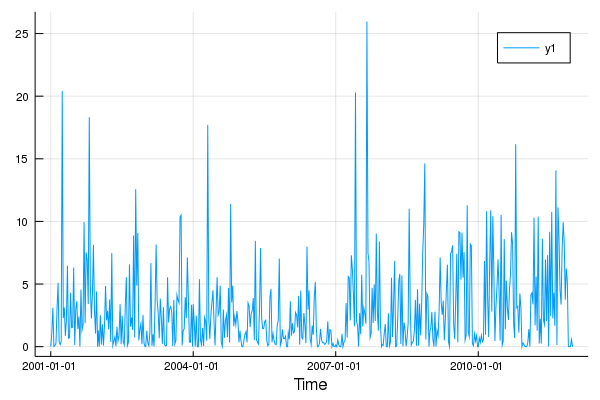

In [128]:
plotTS(cube_base, lat = 1.5, lon = 18.5, variable = "precipitation")

In [159]:
function month_mean_ts(m, v)
    amj_idx = 
        cube_base.timeAxis.values |> 
        x -> findall(xx -> Month(xx) in [Month.(m)...], x)

    amj_y =
        cube_base.timeAxis.values[amj_idx] |>
        x -> Year.(x)

    amj_gpp = cube_base[
            axVal2Index(cube_base.lonAxis, 14):axVal2Index(cube_base.lonAxis, 30),
            axVal2Index(cube_base.latAxis,  5):axVal2Index(cube_base.latAxis, -6),
            :,
            axVal2Index(cube_base.varAxis, v)
        ] 
    
    amj_gpp = [
        mean(amj_gpp[:, :, amj_idx[amj_y .== y]], dims = 3)
        for y in unique(amj_y)
    ] |> x -> cat(x..., dims = 3)
    
    function slope(y)
        yy = missing_to_nan(y)
        x = [collect(1:length(y)) repeat([1], length(y))]
        #@show size(x)
        #@show x' * x
        #@show x' * y
        res = (x' * x) \ (x' * yy)
        return res[1]
    end
    
    #return mapslices(xx -> xx |> skipmissing |> mean, amj_gpp, dims = [3]) |> x -> dropdims(x, dims = 3)
    return mapslices(slope, amj_gpp, dims = [3]) |> x -> dropdims(x, dims = 3) |> x -> x[:, end:-1:1]
end

R"""

pdf($(joinpath(fig_path, "congo_browning.pdf")), width = 5, height = 4)
pal <- (brewer.pal(name = "BrBG", n = 11))
dat <- $(month_mean_ts(4:6, "gross_primary_productivity"))
sym_range <- function(d) {
    r <- range(d, na.rm = TRUE)
    ra <- abs(r)
    ram <- max(ra)
print(ram)
    c(-ram, ram)
}


image(
    seq(14, 30, length.out = dim(dat)[1]),
    seq(-6, 5, length.out = dim(dat)[2]),
    dat,
main = "GPP trends AMJ 2000 - 2011",
    zlim = sym_range(dat),
    col = pal,
    xlab = expression("Lon " * group("[", degree, "]")),
    ylab = expression("Lat " * group("[", degree, "]"))
)

plot(getMap(), add = TRUE)

image(t(1:11), col = pal)

dev.off()
"""

show_pdf("https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/congo_browning.pdf", width = 900)
    

[1] 0.05273708


(object { attributes=Dict(:type=>"application/pdf",:height=>"500",:data=>"https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/congo_browning.pdf",:width=>"900") }
  "pdf not found")

In [139]:
R"library(rworldmap)"

┌ Warning: RCall.jl: ### Welcome to rworldmap ###
│ For a short introduction type : 	 vignette('rworldmap')
└ @ RCall /Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/RCall/29zDq/src/io.jl:113


RObject{StrSxp}
 [1] "rworldmap"    "forcats"      "stringr"      "dplyr"        "purrr"       
 [6] "readr"        "tidyr"        "tibble"       "tidyverse"    "ncdf4"       
[11] "energy"       "strucchange"  "sandwich"     "zoo"          "maps"        
[16] "maptools"     "RColorBrewer" "gridExtra"    "animation"    "raster"      
[21] "sp"           "ggthemes"     "ggplot2"      "grid"         "stats"       
[26] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[31] "base"        


In [131]:
cube_base.varAxis.values

42-element Array{String,1}:
 "Rg"                               
 "aerosol_optical_thickness_1610"   
 "aerosol_optical_thickness_550"    
 "aerosol_optical_thickness_555"    
 "aerosol_optical_thickness_659"    
 "aerosol_optical_thickness_865"    
 "air_temperature_2m"               
 "air_temperature_max"              
 "air_temperature_min"              
 "bare_soil_evaporation"            
 "black_sky_albedo"                 
 "burnt_area"                       
 "c_emissions"                      
 ⋮                                  
 "root_moisture"                    
 "sensible_heat"                    
 "snow_sublimation"                 
 "snow_water_equivalent"            
 "soil_moisture"                    
 "surface_moisture"                 
 "terrestrial_ecosystem_respiration"
 "transpiration"                    
 "vapour_pressure_deficit"          
 "water_vapour"                     
 "white_sky_albedo"                 
 "wind"                             

In [10]:
myequal(x, y) = if ismissing(x) && ismissing(y)
    return true
elseif ismissing(x) && !ismissing(y)
    return false
elseif !ismissing(x) && ismissing(y)
    return false
else
    return x == y
end

myequal (generic function with 1 method)

In [11]:
findall(!,
    myequal.(
        ifelsemiss.(pca_trends_pvals_adj[1, :, :] .< 0.05, (365 / 8) .* pca_trends[1, :, :], zero(eltype(pca_trends)), missing),
        ((365 / 8) .* pca_trends[1, :, :] .* (pca_trends_pvals_adj[1, :, :] .< 0.05))
    )    
)

0-element Array{CartesianIndex{2},1}

In [21]:
col = [
    "#F58439" "#FDB739" "#BED85A" "#76C04B" "#00AC4E";
    "#F47C57" "#FAB380" "#D5E6A2" "#81C99B" "#00B189";
    "#F1687A" "#F6A3AE" "#F0F0F0" "#77CDCE" "#00B4B7";
    "#EE4498" "#C880B6" "#A8A4D1" "#44B5E8" "#00B3E5";
    "#A53F97" "#7E54A2" "#596AB2" "#1977BD" "#007EC4"
    ] |>
    x -> x[:, end:-1:1] |>
    collect

scale_1_5(xx, xxlim) =
    ((xx - xxlim[1]) / (xxlim[2] - xxlim[1]) * 5) |>
    xxx -> ceil(Int, xxx) |>
    xxx -> clamp(xxx, 1, 5)

xlim = (-0.04, 0.04)
ylim = (-0.05, 0.05)

function f(x, y)
    if ismissing(x) || ismissing(y)
        missing
    elseif x == 0 && y == 0
        # the actual zeros are the nonsignificant values
        nonsignificant_color
    else
        i = scale_1_5(x, xlim)
        j = scale_1_5(y, ylim)
        col[i, j]
    end
end



f (generic function with 1 method)

In [25]:
    (365 / 8) * pca_trends[1, 7, 75], 
    (365 / 8) * pca_trends[2, 7, 75],
    (365 / 8) * pca_trends[1, 7, 75] * (pca_trends_pvals_adj[1, 7, 75] < 0.05), 
    (365 / 8) * pca_trends[2, 7, 75] * (pca_trends_pvals_adj[2, 7, 75] < 0.05)


(0.016260086395050166, -0.04879468906437978, 0.0, -0.04879468906437978)

In [24]:
f(
    (365 / 8) * pca_trends[1, 7, 75], 
    (365 / 8) * pca_trends[2, 7, 75]
),
f(
    (365 / 8) * pca_trends[1, 7, 75] * (pca_trends_pvals_adj[1, 7, 75] < 0.05), 
    (365 / 8) * pca_trends[2, 7, 75] * (pca_trends_pvals_adj[2, 7, 75] < 0.05)
)


#pca_trends_pvals_adj[1, 341, 71], pca_trends_pvals_adj[2, 341, 71]

("#00B3E5", "#00B4B7")

In [15]:
legend_data = colorbar_2d_teuling2011(
        ((365 / 8) .* pca_trends[1, :, :] .* (pca_trends_pvals_adj[1, :, :] .< 0.05)),
        ((365 / 8) .* pca_trends[2, :, :] .* (pca_trends_pvals_adj[2, :, :] .< 0.05)),
#ifelsemiss.(pca_trends_pvals_adj[1, :, :] .< 0.05, (365 / 8) .* pca_trends[1, :, :], zero(eltype(pca_trends))),
#ifelsemiss.(pca_trends_pvals_adj[2, :, :] .< 0.05, (365 / 8) .* pca_trends[2, :, :], zero(eltype(pca_trends))),
#        ((365 / 8) .* pca_trends[1, :, :]),
#        ((365 / 8) .* pca_trends[2, :, :]),
#        get_q((365 / 8) .* (pca_trends_pvals_adj[1, :, :] .< 0.05) .* pca_trends[1, :, :], 0.1),
#        get_q((365 / 8) .* (pca_trends_pvals_adj[2, :, :] .< 0.05) .* pca_trends[2, :, :], 0.1)
        (-0.04, 0.04), 
        (-0.05, 0.05)
)

720×1440 Array{Union{Missing, String},2}:
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  

In [16]:
map_data = colorbar_2d_teuling2011(
        #((365 / 8) .* pca_trends[1, :, :] .* (pca_trends_pvals_adj[1, :, :] .< 0.05)),
        #((365 / 8) .* pca_trends[2, :, :] .* (pca_trends_pvals_adj[2, :, :] .< 0.05)),
#ifelsemiss.(pca_trends_pvals_adj[1, :, :] .< 0.05, (365 / 8) .* pca_trends[1, :, :], zero(eltype(pca_trends))),
#ifelsemiss.(pca_trends_pvals_adj[2, :, :] .< 0.05, (365 / 8) .* pca_trends[2, :, :], zero(eltype(pca_trends))),
        ((365 / 8) .* pca_trends[1, :, :]),
        ((365 / 8) .* pca_trends[2, :, :]),
#        get_q((365 / 8) .* (pca_trends_pvals_adj[1, :, :] .< 0.05) .* pca_trends[1, :, :], 0.1),
#        get_q((365 / 8) .* (pca_trends_pvals_adj[2, :, :] .< 0.05) .* pca_trends[2, :, :], 0.1)
        (-0.04, 0.04), 
        (-0.05, 0.05)
)

720×1440 Array{Union{Missing, String},2}:
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing  …  missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  missing  missing
 missing  missing  missing  missing     missing  missing  

In [17]:
myeq(x, y) = 
if ismissing(x) && ismissing(y)
    return true
elseif ismissing(x) && !ismissing(y)
    return false
elseif !ismissing(x) && ismissing(y)
    return false
elseif x == "#FFFFFF" || y == "#FFFFFF"
    return true
else
    return x == y
end

myeq (generic function with 1 method)

In [18]:
findall(.!myeq.(legend_data, map_data))

40645-element Array{CartesianIndex{2},1}:
 CartesianIndex(75, 7)    
 CartesianIndex(75, 8)    
 CartesianIndex(146, 53)  
 CartesianIndex(147, 53)  
 CartesianIndex(146, 54)  
 CartesianIndex(86, 57)   
 CartesianIndex(85, 58)   
 CartesianIndex(86, 59)   
 CartesianIndex(87, 59)   
 CartesianIndex(88, 59)   
 CartesianIndex(86, 60)   
 CartesianIndex(87, 60)   
 CartesianIndex(88, 60)   
 ⋮                        
 CartesianIndex(106, 1433)
 CartesianIndex(107, 1433)
 CartesianIndex(431, 1433)
 CartesianIndex(512, 1433)
 CartesianIndex(105, 1434)
 CartesianIndex(106, 1434)
 CartesianIndex(106, 1435)
 CartesianIndex(427, 1436)
 CartesianIndex(108, 1437)
 CartesianIndex(427, 1437)
 CartesianIndex(427, 1438)
 CartesianIndex(427, 1439)

In [19]:
legend_data[75, 7]

"#00B4B7"

In [20]:
map_data[75, 7]

"#00B3E5"

In [17]:
pca_trends[1, 341, 71], pca_trends[2, 341, 71],
pca_trends_pvals_adj[1, 341, 71], pca_trends_pvals_adj[2, 341, 71]

(0.00058275973f0, 0.00040226866f0, 0.023116127f0, 0.47143632f0)

In [81]:
get_q((365 / 8) .* (pca_trends_pvals_adj[1, :, :] .< 0.05) .* pca_trends[1, :, :], 0.1),
  get_q((365 / 8) .* (pca_trends_pvals_adj[2, :, :] .< 0.05) .* pca_trends[2, :, :], 0.1),
  get_q((365 / 8) .* pca_trends[1, :, :], 0.1),
  get_q((365 / 8) .* pca_trends[2, :, :], 0.1)

((-0.03390777823369717, 0.03390777823369717), (-0.05312316949130036, 0.05312316949130036), (-0.038053191601647995, 0.038053191601647995), (-0.05335300120350439, 0.05335300120350439))

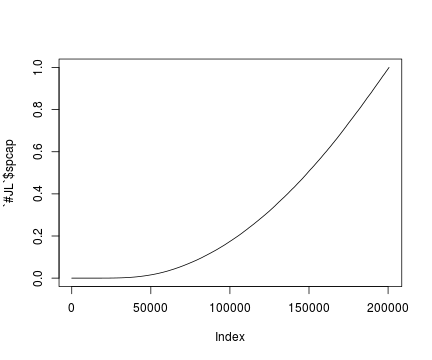

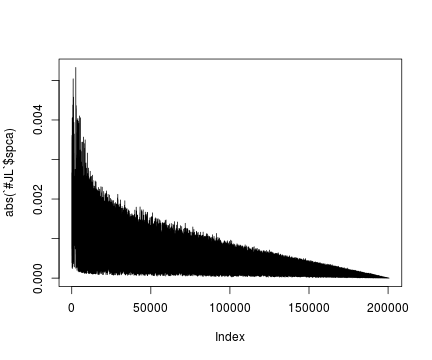

RObject{NilSxp}
NULL


In [98]:
nomissidx = findall(!ismissing, pca_trends_pvals_adj[1, :, :] |> vec |> collect)
sp = sortperm(pca_trends_pvals_adj[1, :, :] |> vec |> collect |> x -> x[nomissidx])
spca = pca_trends[1, :, :] |> vec |> collect |> x -> x[nomissidx] |> x -> x[sp]
spcap = pca_trends_pvals[1, :, :] |> vec |> collect |> x -> x[nomissidx] |> x -> x[sp]

R"""
plot($spcap, type = "l")
plot(abs($spca), type = "l")
"""

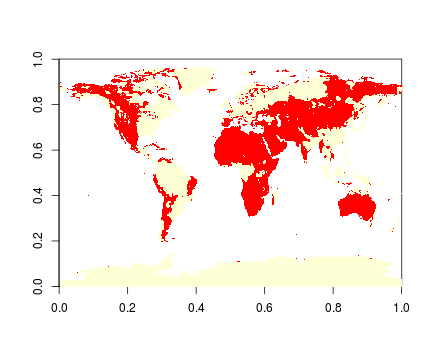

In [3]:
R"""
dryness_cube2 <- $(dryness_cube2[:, :] |> collect)
image((log10(dryness_cube2) > -0.16)[, dim(dryness_cube2)[2]:1])
""";

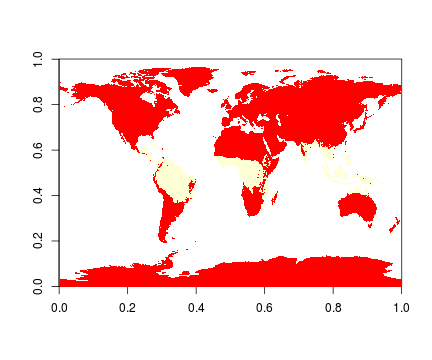

RObject{NilSxp}
NULL


In [13]:
R"""
# from rubel et al 2017:
koeppen_levels <- c('Af', 'Am', 'As', 'Aw', 
                    'BSh', 'BSk', 'BWh', 'BWk', 
                    'Cfa', 'Cfb','Cfc', 'Csa', 'Csb', 'Csc', 'Cwa','Cwb', 'Cwc', 
                    'Dfa', 'Dfb', 'Dfc','Dfd', 'Dsa', 'Dsb', 'Dsc', 'Dsd','Dwa', 'Dwb', 'Dwc', 'Dwd', 
                    'EF','ET', 'Ocean')
koeppen_classes <- t(as.matrix(aggregate(raster("/scratch/gkraemer/global_pca_j1/Map_KG-Global/KG_1986-2010.grd"), fact = 3, fun = modal)))
dim(koeppen_classes)
koeppen_lv1_classes <- apply(
    koeppen_classes, 
    1:2, 
    function(i) {
        tmp <- substr(koeppen_levels[i], 1, 1)
        if (tmp == "O") NA else tmp
    }
)
image((koeppen_lv1_classes == "A")[,dim(koeppen_lv1_classes)[2]:1])
"""

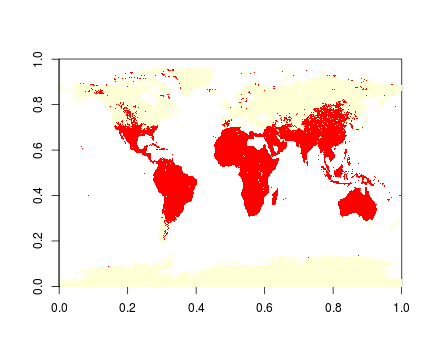

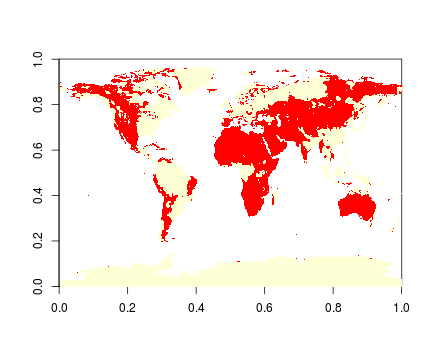

In [14]:
R"""
dryness_cube1 <- $(dryness_cube1[:, :] |> collect)
dryness_cube2 <- $(dryness_cube2[:, :] |> collect)
image((log10(dryness_cube1) > 0.5)[, dim(dryness_cube1)[2]:1])
image((log10(dryness_cube2) > -0.16)[, dim(dryness_cube2)[2]:1])
""";

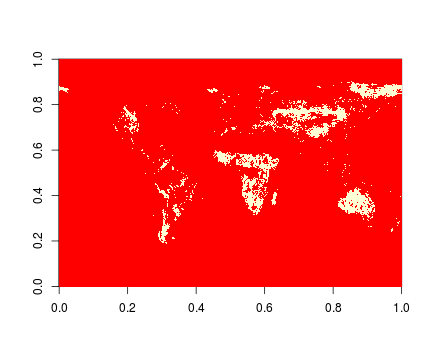

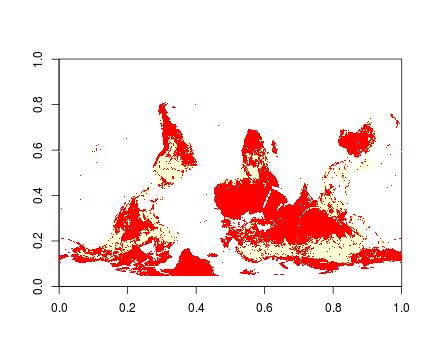

 [1] "Cultivated_land"     "Forest"              "Grassland"          
 [4] "Shrubland"           "Wetland"             "Water_bodies"       
 [7] "Tundra"              "Artificial_Surfaces" "Bareland"           
[10] "Permanent_Snow_Ice" 
[1] 1440  720


RObject{NilSxp}
NULL


In [15]:
R"""
landcover <- nc_open("/Net/Groups/BGI/data/DataStructureMDI/DATA/grid/Global/0d25_static/globland30/v1/Data/globland30.fractional.1440.720.nc")
landcover_layers <- lapply(names(landcover$var), function(x) ncvar_get(landcover, x))
landcover_array <- do.call(c, landcover_layers)
dim(landcover_array) <- c(1440, 720, length(landcover_layers))
max_landcover_array <- apply(landcover_array, c(1, 2), function(x) ifelse(all(is.na(x)), 0, which.max(x)))
landcover_class_names <- names(landcover$var)
image((max_landcover_array == 3)[,dim(max_landcover_array)[2]:1])
print(landcover_class_names)
print(dim(max_landcover_array))
max_landcover_array_classes <- apply(
    max_landcover_array, 
    1:2, 
    function(x) if(x == 0) NA else landcover_class_names[x]
)
image(max_landcover_array_classes == "Forest")
"""

Widgets.Widget{:ESDLPlot,Compose.Context}(OrderedCollections.OrderedDict{Symbol,Any}(:PcaAxis=>Widget{:dropdown,Any}(OrderedCollections.OrderedDict{Symbol,Any}(:options=>Observable{Any} with 2 listeners. Value:
["PCA_1", "PCA_2", "PCA_3", "PCA_4", "PCA_5", "PCA_6", "PCA_7", "PCA_8", "PCA_9", "PCA_10", "PCA_11", "PCA_12"],:index=>Observable{Any} with 2 listeners. Value:
1), Observable{Any} with 2 listeners. Value:
"PCA_1", Scope("knockout-component-10340466-f6f3-47b5-9bf3-6c4bd9cd3d25", Node{DOM}(DOM(:html, :div), Any["PcaAxis", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :select), Any[], Dict{Symbol,Any}(:attributes=>Dict{Union{String, Symbol},Any}(Symbol("data-bind")=>"options : options_js, value : index, optionsText: 'key', optionsValue: 'val', valueAllowUnset: true, optionsAfterRender: disablePlaceholder")), 0)], Dict{Symbol,Any}(:className=>"select "), 1)], Dict{Symbol,Any}(:style=>Dict("display"=>"flex","flex-direction"=>"column")), 3), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedCollections.OrderedDict[OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_1","val"=>1,"id"=>"idGfDBHIUS"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_2","val"=>2,"id"=>"idf8dhrLqg"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_3","val"=>3,"id"=>"idxAFUufH7"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_4","val"=>4,"id"=>"idEfmRvLaM"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_5","val"=>5,"id"=>"idm0aStlPK"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_6","val"=>6,"id"=>"idBNwoFFs7"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_7","val"=>7,"id"=>"idxyDsiFsR"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_8","val"=>8,"id"=>"idbGjyObGc"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_9","val"=>9,"id"=>"idPhQOhAS8"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_10","val"=>10,"id"=>"id4aOS9Hak"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_11","val"=>11,"id"=>"idHholvc4b"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_12","val"=>12,"id"=>"idaJVV9x8R")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Any["knockout"=>"/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/PTCUD/src/../assets/all.js", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/PTCUD/src/../assets/style.css", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"options_js\\\":[{\\\"key\\\":\\\"PCA_1\\\",\\\"val\\\":1,\\\"id\\\":\\\"idGfDBHIUS\\\"}
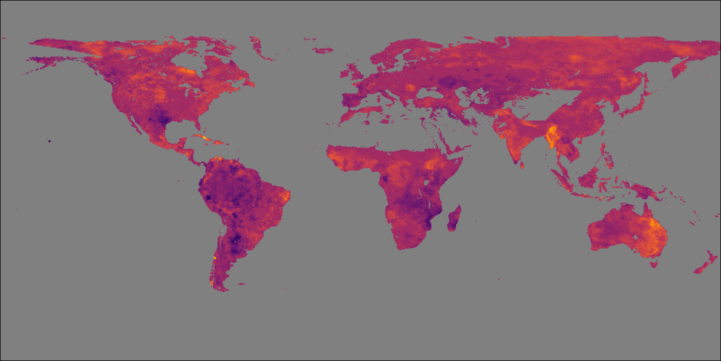
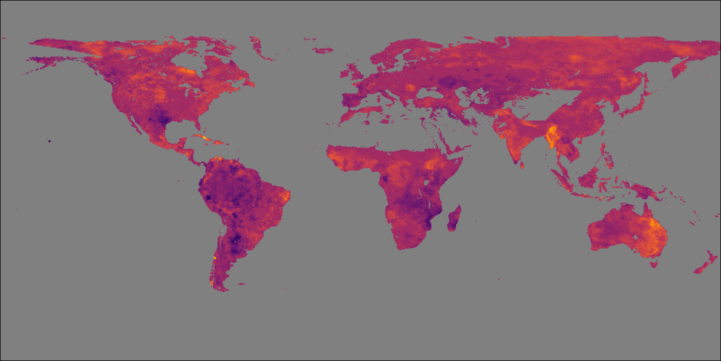

In [16]:
plotMAP(pca_trends)

Widgets.Widget{:ESDLPlot,Compose.Context}(OrderedCollections.OrderedDict{Symbol,Any}(:PcaAxis=>Widget{:dropdown,Any}(OrderedCollections.OrderedDict{Symbol,Any}(:options=>Observable{Any} with 2 listeners. Value:
["PCA_1", "PCA_2", "PCA_3", "PCA_4", "PCA_5", "PCA_6", "PCA_7", "PCA_8", "PCA_9", "PCA_10", "PCA_11", "PCA_12"],:index=>Observable{Any} with 2 listeners. Value:
1), Observable{Any} with 2 listeners. Value:
"PCA_1", Scope("knockout-component-69125780-56a9-481f-ab28-fe5601b1bc43", Node{DOM}(DOM(:html, :div), Any["PcaAxis", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :select), Any[], Dict{Symbol,Any}(:attributes=>Dict{Union{String, Symbol},Any}(Symbol("data-bind")=>"options : options_js, value : index, optionsText: 'key', optionsValue: 'val', valueAllowUnset: true, optionsAfterRender: disablePlaceholder")), 0)], Dict{Symbol,Any}(:className=>"select "), 1)], Dict{Symbol,Any}(:style=>Dict("display"=>"flex","flex-direction"=>"column")), 3), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("options_js"=>(Observable{Any} with 1 listeners. Value:
OrderedCollections.OrderedDict[OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_1","val"=>1,"id"=>"idt0HnOCaa"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_2","val"=>2,"id"=>"idaxWIPgcM"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_3","val"=>3,"id"=>"idIkHJQiHg"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_4","val"=>4,"id"=>"idUx2ROIT4"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_5","val"=>5,"id"=>"idN9fjN9El"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_6","val"=>6,"id"=>"idtdYEq3Em"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_7","val"=>7,"id"=>"idaFMYquOp"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_8","val"=>8,"id"=>"idudSaG4eG"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_9","val"=>9,"id"=>"idxsw5ey1Y"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_10","val"=>10,"id"=>"idFKioObEk"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_11","val"=>11,"id"=>"idz455OXBQ"), OrderedCollections.OrderedDict{String,Any}("key"=>"PCA_12","val"=>12,"id"=>"idFBP7XAWj")], nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Any["knockout"=>"/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/PTCUD/src/../assets/all.js", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBase/PTCUD/src/../assets/style.css", "/Net/Groups/BGI/people/gkraemer/.julia_atacama/packages/InteractBulma/PH56C/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"options_js\\\":[{\\\"key\\\":\\\"PCA_1\\\",\\\"val\\\":1,\\\"id\\\":\\\"idt0HnOCaa\\\"}
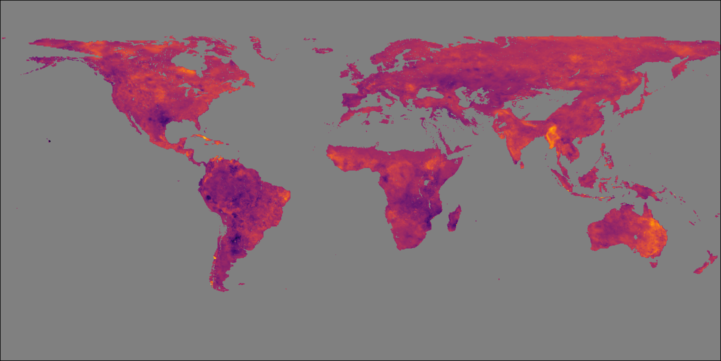
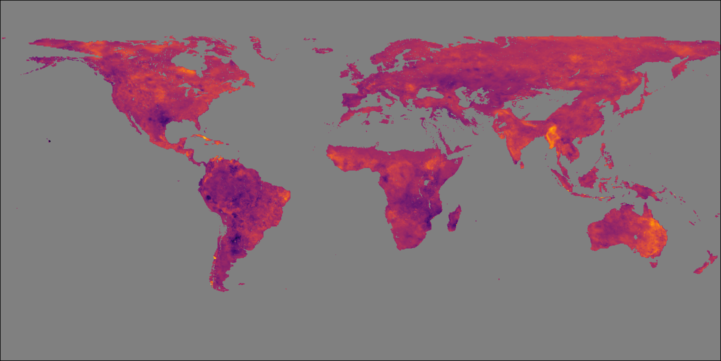

In [17]:
plotMAP(pca_trends_2)

In [11]:
1+1

In [6]:
R"""
pdf($(joinpath(fig_path, "slopes_pt_vs_pca.pdf")), width = 10, height = 10)



pca_col_data <- $(colorbar_2d_teuling2011_quant(
        (365 / 8) .* pca_trends[1, :, :],
        (365 / 8) .* pca_trends[2, :, :],
        0.1, 0.1, missing
))

pca_col <- as.vector(pca_col_data$col_map)

pca_1_coords <- $(((365 / 8) .* pca_trends[1, :, :]) |> collect |> missing_to_nan |> vec)
pca_2_coords <- $(((365 / 8) .* pca_trends[2, :, :]) |> collect |> missing_to_nan |> vec)

#pca_1_coords_non_sig <- $((46 * pca_trends_2[1, :, :]) |> collect |> missing_to_nan |> vec)
#pca_2_coords_non_sig <- $((46 * pca_trends_2[2, :, :]) |> collect |> missing_to_nan |> vec)

#pt_col_data <- $(colorbar_2d_teuling2011_quant(
#         46 * permutedims(pt_trends, (3, 1, 2))[1, :, :],
#        -46 * permutedims(pt_trends, (3, 1, 2))[2, :, :],
#        q, q, missing
#))
#pt_col <- as.vector(pt_col_data$col_map)

#t_coords <- $(( 46 * pt_trends[:, :, 1]) |> collect |> missing_to_nan |> vec)
#p_coords <- $((-46 * pt_trends[:, :, 2]) |> collect |> missing_to_nan |> vec)

#t_coords_non_sig <- $(( 46 * pt_trends_2[:, :, 1]) |> collect |> missing_to_nan |> vec)
#p_coords_non_sig <- $((-46 * pt_trends_2[:, :, 2]) |> collect |> missing_to_nan |> vec)


#layout(matrix(1:4, 2, byrow = TRUE))
plot(
    pca_1_coords, pca_2_coords, 
    col = pca_col, 
    pch = ".",
    #xlim = range(pca_col_data$x_ticks) * 3, 
    #ylim = range(pca_col_data$y_ticks) * 3
)

#plot(
#    t_coords, p_coords, 
#    col = pt_col, 
#    #xlim = range(pt_col_data$x_ticks) * 3, 
#    #ylim = range(pt_col_data$y_ticks) * 3
#)

#plot(
#    pca_1_coords, pca_2_coords, 
#    col = pt_col, 
#    #xlim = range(pca_col_data$x_ticks) * 3, 
#    #ylim = range(pca_col_data$y_ticks) * 3
#)

#plot(
#    t_coords, p_coords, 
#    col = pca_col, 
#    #xlim = range(pt_col_data$x_ticks) * 3, 
#    #ylim = range(pt_col_data$y_ticks) * 3
#)
dev.off()
"""

# too many points, will hang your browser!!!
#show_pdf("https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/slopes_pt_vs_pca.pdf")

RObject{IntSxp}
null device 
          1 


In [19]:
R"""
trends_by_cover_df <- data.frame(
    PC1         = as.vector(pca_1_coords),
    PC2         = as.vector(pca_2_coords),
    PC1_non_sig = as.vector(pca_1_coords_non_sig),
    PC2_non_sig = as.vector(pca_2_coords_non_sig),
    PCcol       = as.vector(pca_col),
    T           = as.vector(t_coords),
    P           = as.vector(p_coords),
    T_non_sig   = as.vector(t_coords_non_sig),
    P_non_sig   = as.vector(p_coords_non_sig),
    PTcol       = as.vector(pt_col),
    Cover       = as.vector(max_landcover_array_classes),
    KGlv1       = as.vector(koeppen_lv1_classes),
    Aridity1    = as.vector(dryness_cube1),
    Aridity2    = as.vector(dryness_cube2),
    stringsAsFactors = FALSE
)
"""

RObject{VecSxp}
                 PC1           PC2   PC1_non_sig   PC2_non_sig   PCcol
1                NaN           NaN           NaN           NaN    <NA>
2                NaN           NaN           NaN           NaN    <NA>
3                NaN           NaN           NaN           NaN    <NA>
4                NaN           NaN           NaN           NaN    <NA>
5                NaN           NaN           NaN           NaN    <NA>
6                NaN           NaN           NaN           NaN    <NA>
7                NaN           NaN           NaN           NaN    <NA>
8                NaN           NaN           NaN           NaN    <NA>
9                NaN           NaN           NaN           NaN    <NA>
10               NaN           NaN           NaN           NaN    <NA>
11               NaN           NaN           NaN           NaN    <NA>
12               NaN           NaN           NaN           NaN    <NA>
13               NaN           NaN           NaN           Na

In [20]:
R"""
nrow(na.exclude(trends_by_cover_df[1:2]))
"""

RObject{IntSxp}
[1] 200621


In [22]:
R"""
png(paste0($(fig_path), "/slopes_pc_col_pt_cover_kg_matrix.png"), width = 2000, height = 2000)
    print(
        ggplot(trends_by_cover_df, aes(x = PC1_non_sig, y = PC2_non_sig, color = PTcol)) +
            geom_point(alpha = 1, size = 0.01) +
            scale_color_identity() +
            facet_grid(KGlv1 ~ Cover, margins = TRUE) +
            theme_bw()
    )
dev.off()


png(paste0($(fig_path), "/slopes_pt_col_pc_cover_kg_matrix.png"), width = 2000, height = 2000)
    print(
        ggplot(trends_by_cover_df, aes(x = T_non_sig, y = P_non_sig, color = PCcol)) +
            geom_point(alpha = 1, size = 0.01) +
            scale_color_identity() +
            facet_grid(KGlv1 ~ Cover, margins = TRUE) +
            theme_bw()
    )
dev.off()
"""

RObject{IntSxp}
null device 
          1 


In [23]:
R"""
png(paste0($(fig_path), "/slopes_pt_col_pc_kg.png"), width = 2000, height = 1000)

print(
    ggplot(
            subset(trends_by_cover_df, !is.na(KGlv1)), 
            aes(x = T_non_sig, y = P_non_sig, color = PCcol)
        ) +
        geom_point(alpha = 0.5, size = 1) +
        scale_color_identity() +
        facet_wrap(vars(KGlv1)) +
        theme_bw()
)

dev.off()

png(paste0($(fig_path), "/slopes_pc_col_pt_kg.png"), width = 2000, height = 1000)

print(
    ggplot(
            subset(trends_by_cover_df, !is.na(KGlv1)), 
            aes(x = PC1_non_sig, y = PC2_non_sig, color = PTcol)
        ) +
        geom_point(alpha = 0.5, size = 1) +
        scale_color_identity() +
        facet_wrap(vars(KGlv1)) +
        theme_bw()
)

dev.off()
""";

In [24]:
R"""
png($(joinpath(fig_path, "slopes_col_pc_global.png")), width = 500, height = 500)
print(
    ggplot(trends_by_cover_df, aes(x = PC1_non_sig, y = PC2_non_sig)) +
        geom_point(color = trends_by_cover_df$PCcol, alpha = 0.5) 
)
dev.off()
png($(joinpath(fig_path, "slopes_col_pt_global.png")), width = 500, height = 500)
print(
    ggplot(trends_by_cover_df, aes(x = T, y = P)) +
        geom_point(color = trends_by_cover_df$PTcol, alpha = 0.5)
)
dev.off()
png($(joinpath(fig_path, "slopes_pc_col_pt_global.png")), width = 500, height = 500)
print(
    ggplot(trends_by_cover_df, aes(x = PC1_non_sig, y = PC2_non_sig)) +
        geom_point(color = trends_by_cover_df$PTcol, alpha = 0.5)
)
dev.off()
png($(joinpath(fig_path, "slopes_pt_col_pc_global.png")), width = 500, height = 500)
print(
    ggplot(trends_by_cover_df, aes(x = T, y = P)) +
        geom_point(color = trends_by_cover_df$PCcol, alpha = 0.5)
)
dev.off()
"""

RObject{IntSxp}
null device 
          1 


In [25]:
# there are correlations between PC1 and PC2 because they are TRENDS!!!
R"""
tri_to_df <- function (x) {
    n <- nrow(x)

    col_nam <- character((n^2 - n) / 2)
    row_nam <- character((n^2 - n) / 2)
    dat <- numeric((n^2 - n) / 2)

    k <- 1
    for (i in 1:(n - 1)) {
        for (j in (i+1):n) {
            col_nam[k] <- colnames(x)[i]
            row_nam[k] <- rownames(x)[j]
            dat[k] <- x[j, i]
            k <- k + 1
        }
    }
    data.frame(row_names = row_nam, col_names = col_nam, value = dat)
}
""";

In [26]:
R"""
cor_pt_pc_df <- tri_to_df(cor(trends_by_cover_df[c("PC1_non_sig", "PC2_non_sig", "P_non_sig", "T_non_sig")], use = "pairwise.complete.obs"))
cor_pt_pc_df$KGlv1 <- "global"

for(kg in LETTERS[1:5]) { try({

    tmp_data <- subset(trends_by_cover_df, KGlv1 == kg)
    tmp_df <- tri_to_df(cor(tmp_data[c("PC1_non_sig", "PC2_non_sig", "P_non_sig", "T_non_sig")], use = "pairwise.complete.obs"))

    tmp_df$KGlv1 <- kg

    cor_pt_pc_df <- rbind(cor_pt_pc_df, tmp_df)
})}
cor_pt_pc_df %<>% 
    dplyr::mutate(
        row_names = gsub("_non_sig", "", row_names),
        col_names = gsub("_non_sig", "", col_names)
    ) %>%
    dplyr::mutate(
        names = paste(row_names, "vs.", col_names)
    ) %>%
    dplyr::rename(cors = value)
    
"""

RObject{VecSxp}
   row_names col_names         cors  KGlv1       names
1        PC2       PC1 -0.688500817 global PC2 vs. PC1
2          P       PC1 -0.276714012 global   P vs. PC1
3          T       PC1  0.060450394 global   T vs. PC1
4          P       PC2  0.327512490 global   P vs. PC2
5          T       PC2  0.134563823 global   T vs. PC2
6          T         P -0.125606771 global     T vs. P
7        PC2       PC1 -0.851430058      A PC2 vs. PC1
8          P       PC1 -0.335099281      A   P vs. PC1
9          T       PC1 -0.229508314      A   T vs. PC1
10         P       PC2  0.435837238      A   P vs. PC2
11         T       PC2  0.215403147      A   T vs. PC2
12         T         P  0.167059842      A     T vs. P
13       PC2       PC1 -0.828278155      B PC2 vs. PC1
14         P       PC1 -0.359304352      B   P vs. PC1
15         T       PC1 -0.545105114      B   T vs. PC1
16         P       PC2  0.443822079      B   P vs. PC2
17         T       PC2  0.543145410      B   T vs

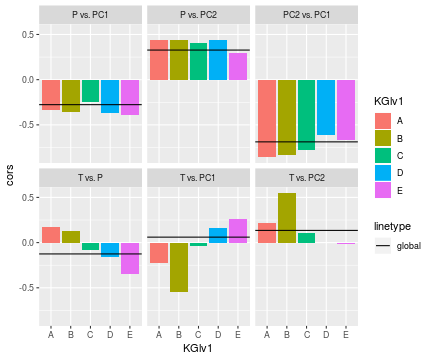

RObject{VecSxp}


In [27]:
R"""
cor_pt_pc_df %>%
    dplyr::filter(KGlv1 != "global") %>%
    ggplot(aes(x = KGlv1, y = cors, fill = KGlv1)) +
        geom_bar(stat = "identity") +
        geom_hline(
            data = cor_pt_pc_df %>% dplyr::filter(KGlv1 == "global"),
            aes(yintercept = cors, linetype = "global")
        ) +
        facet_wrap(vars(names))

"""

In [28]:
R"""
pdf($(joinpath(fig_path, "slopes_pt_nolog2.pdf")), width = 10, height = 5)
legend_size <- 120
legend_x <- unit(legend_size / 2, "points") + unit(2.7, "line")
legend_y <- unit(legend_size / 2, "points") + unit(3.5, "line")
axis_label_rot <- 20

map_data <- $(colorbar_2d_teuling2011_quant(
         365 * permutedims(pt_trends, (3, 1, 2))[1, :, :],
        -365 * permutedims(pt_trends, (3, 1, 2))[2, :, :],
        0.1, 0.1
))

x_ticks <- map_data$x_ticks
y_ticks <- map_data$y_ticks


grid.raster(
    t(map_data$col_map),
    interpolate = FALSE
)

pushViewport(viewport(
    x = legend_x, 
    y = legend_y, 
    width = unit(legend_size, "points"), 
    height = unit(legend_size, "points"),))

grid.raster(
    t($(colorbar_2d_teuling2011_quant(
        reshape(repeat(-2:2, inner = 5), 5, 5)',
        reshape(repeat(2:-1:-2, inner = 5), 5, 5), 
        0, 0
    )[:col_map])),
    interpolate = FALSE
)
grid::grid.xaxis(
    at = seq(from = 0, to = 1, length.out = length(x_ticks)),
    label = c(" ", label = sprintf("%0.2e", x_ticks)[c(-1, -length(x_ticks))], " "),
    gp = gpar(cex = 0.5),
    edits = gEdit(gPath = "labels", rot = axis_label_rot, just = "top")
)
grid::grid.yaxis(
    at = seq(from = 0, to = 1, length.out = length(y_ticks)),
    label = c(" ", label = sprintf("%0.2e", y_ticks)[c(-1, -length(y_ticks))], " "),
    gp = gpar(cex = 0.5),
    edits = gEdit(gPath = "labels", rot = 90 - axis_label_rot, just = "bottom")
)
grid::grid.text(
    expression(lower%<-%T[air]~group("[", scriptstyle(frac(degree*C, y)), "]")%->%higher),
    x = 0.5, 
    y = unit(0, "npc") - unit(1.5, "line"),
    just = "top"
)
grid::grid.text(
    expression(wetter%<-%precip~group("[", scriptstyle(frac(mm, d~y)), "]")%->%dryer),
    x = unit(-1.5, "line"),
    y = 0.5,
    just = "bottom", rot = 90
)
"""
show_pdf("https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/slopes_pt_nolog2.pdf", width = 700)

(object { attributes=Dict(:type=>"application/pdf",:height=>"500",:data=>"https://atacama.bgc-jena.mpg.de/user/gkraemer/files/scratch/gkraemer/global_pca_j1/fig/slopes_pt_nolog2.pdf",:width=>"700") }
  "pdf not found")

In [4]:
pca_trends_pvals_adj

Memory mapped cube with the following dimensions
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 59.33 MB


In [5]:
pca_trends

Memory mapped cube with the following dimensions
PcaAxis             Axis with 12 elements: PCA_1 PCA_2 .. PCA_11 PCA_12 
Lon                 Axis with 1440 Elements from -179.875 to 179.875
Lat                 Axis with 720 Elements from 89.875 to -89.875
Total size: 59.33 MB


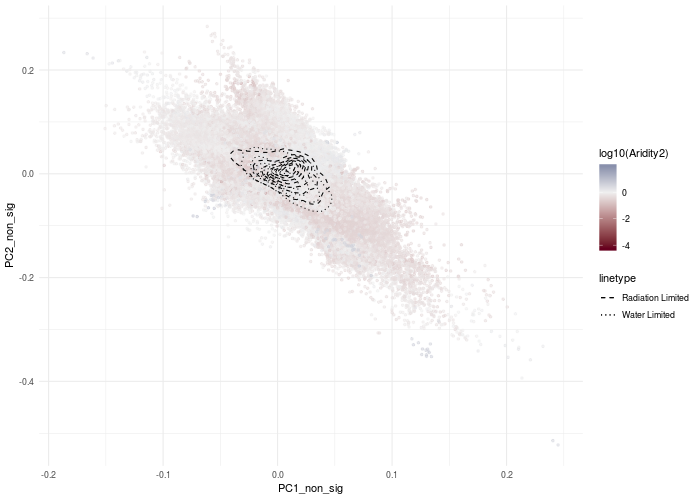

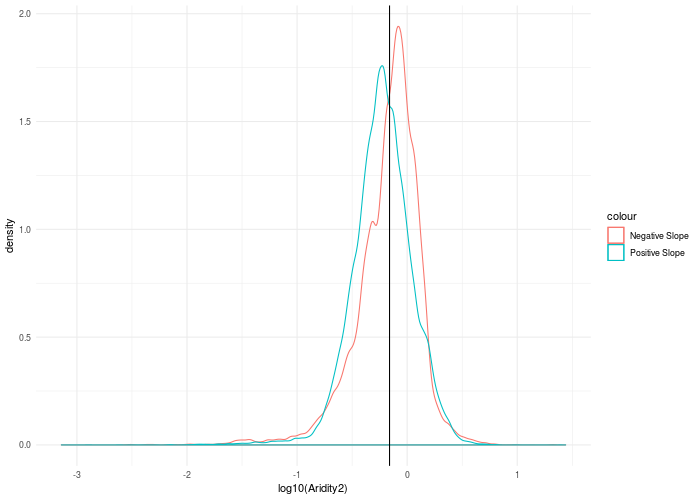

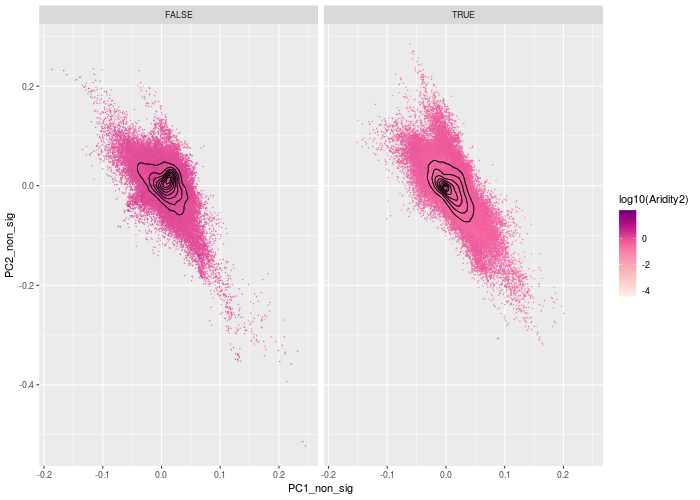

In [30]:
R"""
options(device = function(filename=getOption('rcalljl_filename'),...) png(filename, width = 700, height = 500, ...))

randomize_rows <- function(x) x[sample.int(nrow(x)), ]

print(
    ggplot(
        trends_by_cover_df,
        aes(x = PC1_non_sig, y = PC2_non_sig, color = log10(Aridity2))
    ) +
        geom_point(alpha = 0.5, size = 1) +
        geom_density2d(
            data = subset(trends_by_cover_df, log10(Aridity2) > -0.16),
            aes(x = PC1_non_sig, y = PC2_non_sig, linetype = "Radiation Limited"),
            color = "black"
        ) +
        geom_density2d(
            data = subset(trends_by_cover_df, log10(Aridity2) < -0.16),
            aes(x = PC1_non_sig, y = PC2_non_sig, linetype = "Water Limited"),
            color = "black"
        ) +
        scale_colour_gradient2(
            low = "#67001F", high = "#053061", mid = "#f0f0f0ff", 
            midpoint = 0, na.value = NA
        ) +
        scale_linetype_manual(values = c("dashed", "dotted")) +
        theme_minimal()
)
print(
    ggplot() +
        geom_density(data = subset(trends_by_cover_df, (PC1_non_sig > 0 & PC2_non_sig > 0) | (PC1_non_sig < 0 & PC2_non_sig < 0)), aes(x = log10(Aridity2), color = "Negative Slope")) +
        geom_density(data = subset(trends_by_cover_df, (PC1_non_sig < 0 & PC2_non_sig > 0) | (PC1_non_sig > 0 & PC2_non_sig < 0)), aes(x = log10(Aridity2), color = "Positive Slope")) +
        geom_vline(xintercept = -0.16) +
        theme_minimal()
        
)
print(
    ggplot(
        subset(trends_by_cover_df, !is.na(Aridity2)), 
        aes(x = PC1_non_sig, y = PC2_non_sig, color = log10(Aridity2))
    ) +
        geom_point(alpha = .5, size = 0.01) +
        geom_density2d(color = "black") +
        scale_colour_distiller(palette = "RdPu", direction = 1) +
        facet_wrap(vars(log10(Aridity2) < -0.16))
)
""";